In [1]:
#Iportando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


In [2]:
#Importando o arquivo.
df = pd.read_excel('Perfil dos alunos do Ensino Médio (respostas) (1).xlsx', sheet_name='Respostas ao formulário 1')


In [3]:
#Deixano os nomes das colunas com letras minuscula, para facilitar a pesquisa.
cols = list(df.columns)
cols = [x.lower().strip() for x in cols]
df.columns = cols
df

,carimbo de data/hora,"sim, estou de acordo com a participação da pesquisa e autorizo a sua análise e utilização dos dados que nela estarão contidas.",1. qual é a sua idade?,2. qual é o seu gênero?,3. qual é a sua cor ou raça/etnia?,4. você trabalha? (mesmo que não registrado),5. você tem filhos?,6. você mora em qual município?,7. com quantas pessoas você mora?,8. você é incentivado a ingressar no ensino superior por algum familiar que já tenha feito ou está fazendo uma faculdade?,...,15. quais profissões que você conhece e acha mais interessante para seguir carreira? (liste pelo menos 2).,16. qual dessas áreas você tem mais interesse?,17. por onde você se informa sobre os vestibulares?,"18. qual a probabilidade de você ingressar em um curso da área de tecnologia, mesmo que não seja sua área de interesse, sabendo que é um curso com boas oportunidades no mercado de trabalho?",19. o quanto você depende da contribuição dos seu(s) responsável(is) para cursar uma faculdade?,20. você tem acesso à internet em casa?,"20.1. se sim, qual aparelho eletrônico você usa para acessar à internet?","20.2. se sim, com que frequência você utiliza da tecnologia como meio de acesso à informação para estudar?","21. em cotia tem uma faculdade pública, a faculdade de tecnologia (fatec), você sabia dessa informação?",22. você se interessa em algum dos cursos abaixo oferecidos pela fatec cotia?
0,45049.818900,Li e aceito os termos e condições.,15 anos,Feminino,Preto,Não,Não,Cotia,Três,Sim,...,"Policia científica, marketing","Ciências (Biologia. Física, Química)",Escola/Professores,4,4,Sim,Computador/ Notebook,4.0,"Já ouvi falar, mas não sabia que era pública",Ciência de Dados
1,45049.852535,Li e aceito os termos e condições.,16 anos,Feminino,Pardo,Sim,Não,Cotia,Três,Sim,...,"Advogada, ou na perícia criminal",Exatas (Matemática),Pela mídia e familiares,4,2,Sim,Celular,4.0,Sei um pouco sobre a Fatec e os cursos,Ciência de Dados
2,45050.410003,Li e aceito os termos e condições.,15 anos,Masculino,Branco,Não,Não,Vargem Grande Paulista,Quatro ou mais,Sim,...,Autônomo e empresário,"Ciências (Biologia. Física, Química)",Escola/Professores,1,3,Sim,Celular,5.0,"Já ouvi falar, mas não sabia que era pública",Ciência de Dados
3,45050.441290,Li e aceito os termos e condições.,17 anos,Masculino,Preto,Não,Não,Vargem Grande Paulista,Três,Sim,...,biólogo - ???,"Ciências (Biologia. Física, Química), Humanas ...","Mídia (Internet, TV, Rádio)",4,2,Sim,Celular,5.0,Sei um pouco sobre a Fatec e os cursos,Ciência de Dados
4,45050.443079,Li e aceito os termos e condições.,15 anos,Feminino,Pardo,Não,Não,Vargem Grande Paulista,Três,Sim,...,Medicina Veterinária e Biologa,"Ciências (Biologia. Física, Química)",Amigos/Familiares,4,5,Sim,Celular,3.0,"Já ouvi falar, mas não sabia que era pública",Ciência de Dados
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,45065.891597,Li e aceito os termos e condições.,15 anos,Feminino,Branco,Sim,Não,Cotia,Quatro ou mais,Não,...,Metalurgia,"Linguagem (Espanhol, Inglês, Português)",Escola/Professores,2,3,Sim,Celular,5.0,"Já ouvi falar, mas não sabia que era pública",Nenhum
817,45065.930116,Li e aceito os termos e condições.,16 anos,Feminino,Preto,Não,Não,Cotia,Três,Não,...,Juiza ou advogada,"Exatas (Matemática), Linguagem (Espanhol, Ingl...",Não me informo,4,3,Sim,Celular,1.0,Nunca ouvi falar,Nenhum
818,45065.960729,Li e aceito os termos e condições.,16 anos,Masculino,Pardo,Não,Não,Cotia,Três,Sim,...,Medicina,"Ciências (Biologia. Física, Química)",Escola/Professores,4,3,Sim,Celular,4.0,"Já ouvi falar, mas não sabia que era pública",Nenhum
819,45065.978715,Li e aceito os termos e condições.,18 anos,Feminino,Branco,Não,Não,Cotia,Uma,Sim,...,Administração e informática,"Linguagem (Espanhol, Inglês, Português)",Amigos/Familiares,5,1,Sim,Celular,4.0,"Já ouvi falar, mas não sabia que era pública",Nenhum


In [4]:
#Utilizado para encontrar a coluna desejada, pelo numero inicial da coluna.
substring = '6. '

coluna_desejada = df.filter(like=substring)

coluna_desejada

,6. você mora em qual município?,16. qual dessas áreas você tem mais interesse?
0,Cotia,"Ciências (Biologia. Física, Química)"
1,Cotia,Exatas (Matemática)
2,Vargem Grande Paulista,"Ciências (Biologia. Física, Química)"
3,Vargem Grande Paulista,"Ciências (Biologia. Física, Química), Humanas ..."
4,Vargem Grande Paulista,"Ciências (Biologia. Física, Química)"
...,...,...
816,Cotia,"Linguagem (Espanhol, Inglês, Português)"
817,Cotia,"Exatas (Matemática), Linguagem (Espanhol, Ingl..."
818,Cotia,"Ciências (Biologia. Física, Química)"
819,Cotia,"Linguagem (Espanhol, Inglês, Português)"


In [5]:
# Cores Utilizadas
colors = ['#00FFFF', '#00CED1', '#40E0D0', '#48D1CC']

In [6]:

#Cria um gráfico de pizza 

def grafico_pizza(df, coluna_compara, title=''):

    # Conta os valores únicos na coluna
    contagem_valores = df[coluna_compara].value_counts()


    # Criar o gráfico de pizza
    plt.pie(contagem_valores, labels=contagem_valores.index, autopct='%1.1f%%', startangle=90, colors=colors)

    # Adicionar título
    plt.title(f'{title}')

    # Exibir o gráfico
    plt.show()

In [7]:
#Cria um grafico de barras verticais com percentual.
def grafico_barra_vertical(df, coluna, title=''):    

    # Contagem de valores na coluna
    contagem_valores = df[coluna].value_counts()
    
    # Criar um DataFrame com as contagens
    df_contagem = pd.DataFrame({coluna: contagem_valores.index, 'Contagem': contagem_valores.values})

    # Agrupar por 'Meio de Transporte' e somar as contagens
    df_agrupado = df_contagem.groupby(coluna)['Contagem'].sum().reset_index()

    # Calcular percentual
    df_agrupado['Percentual'] = (df_agrupado['Contagem'] / df_agrupado['Contagem'].sum()) * 100
    
    #Ordena o percentual do menor para o maior
    df_agrupado = df_agrupado.sort_values(by='Percentual', ascending=False)
    
    # Criar o gráfico de barras
    fig, ax = plt.subplots()
    
    # Barra do gráfico
    bars = plt.bar(df_agrupado[coluna], df_agrupado['Percentual'], width=0.6, color = '#00FFFF')
    
    # Adicionar rótulos nas barras com os percentuais
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
    
    # Adicionar rótulos e título
    plt.xlabel('')
    plt.ylabel('Percentual')
    plt.title(f'{title}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    
    
    # Remover números na lateral do eixo y
    ax.yaxis.set_visible(False)


    # Exibir o gráfico
    plt.show()

In [8]:
#Cria um grafico de barras verticais, com percentuais e com rotulos rotacionados para melhor leitura
def grafico_barra_vertical45(df, coluna, title=''):    

    # Contagem de valores na coluna
    contagem_valores = df[coluna].value_counts()
    
    # Criar um DataFrame com as contagens
    df_contagem = pd.DataFrame({coluna: contagem_valores.index, 'Contagem': contagem_valores.values})

    # Agrupar por 'Meio de Transporte' e somar as contagens
    df_agrupado = df_contagem.groupby(coluna)['Contagem'].sum().reset_index()

    # Calcular percentual
    df_agrupado['Percentual'] = (df_agrupado['Contagem'] / df_agrupado['Contagem'].sum()) * 100
    
    #Ordena o percentual do menor para o maior
    df_agrupado = df_agrupado.sort_values(by='Percentual', ascending=False)
    
    # Criar o gráfico de barras
    fig, ax = plt.subplots()
    
    # Barra do gráfico
    bars = plt.bar(df_agrupado[coluna], df_agrupado['Percentual'], width=0.6, color = '#00FFFF')
    
    # Adicionar rótulos nas barras com os percentuais
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
    
    # Adicionar rótulos e título
    plt.xlabel('')
    plt.ylabel('Percentual')
    plt.title(f'{title}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    
    
    # Remover números na lateral do eixo y
    ax.yaxis.set_visible(False)
    
    # Rotacionar os rótulos do eixo x para melhor legibilidade
    plt.xticks(rotation=45, ha='right')

    # Exibir o gráfico
    plt.show()

In [9]:
#Cria um gráfico de barras horizontais.
def grafico_barra_horizontal(df,coluna,title=''):
    # Contagem de valores na coluna
    contagem_valores = df[coluna].value_counts()

    # Criar um DataFrame com as contagens
    df_contagem = pd.DataFrame({coluna: contagem_valores.index, 'Contagem': contagem_valores.values})

    # Agrupar por 'Meio de Transporte' e somar as contagens
    df_agrupado = df_contagem.groupby(coluna)['Contagem'].sum().reset_index()

    # Calcular percentual
    df_agrupado['Percentual'] = (df_agrupado['Contagem'] / df_agrupado['Contagem'].sum()) * 100

    # Ordenar o DataFrame pelo percentual em ordem decrescente
    df_agrupado = df_agrupado.sort_values(by='Percentual', ascending=True)

    # Criar o gráfico de barras
    fig, ax = plt.subplots()

    # Barra do gráfico
    bars = plt.barh(df_agrupado[coluna], df_agrupado['Percentual'], height=0.6, color = '#00FFFF' )


    # Adicionar rótulos nas barras com os percentuais
    for bar in bars:
        yval = bar.get_width()
        plt.text(yval + 1, bar.get_y() + bar.get_height() / 2, f'{yval:.1f}%', va='center')

    # Adicionar rótulos e título
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'{title}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    #Visualização do gráfico
    ax.set_xticks([])
    plt.show()

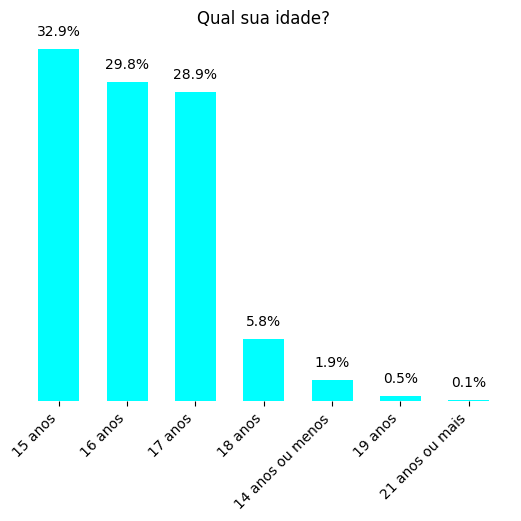

In [10]:
coluna_selecionada = '1. qual é a sua idade?'
grafico_barra_vertical45(df, coluna_selecionada, title='Qual sua idade?')

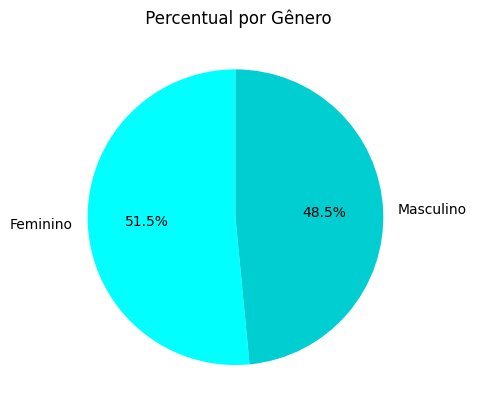

In [11]:
coluna_selecionada = '2. qual é o seu gênero?'
grafico_pizza(df, coluna_selecionada, title=' Percentual por Gênero')

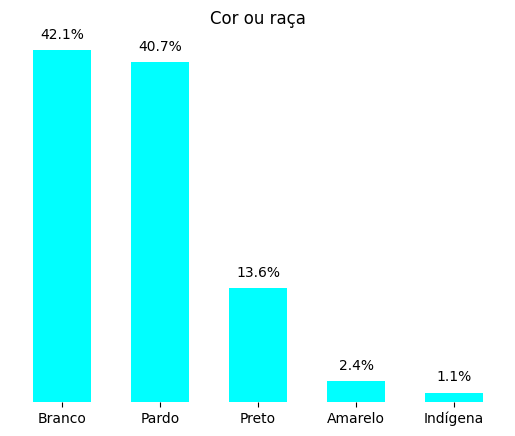

In [12]:
coluna_selecionada = '3. qual é a sua cor ou raça/etnia?'
grafico_barra_vertical(df, coluna_selecionada, title='Cor ou raça')

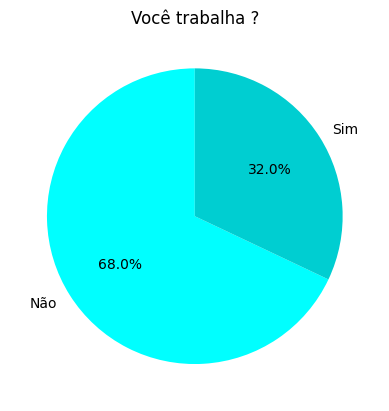

In [13]:
coluna_selecionada = '4. você trabalha? (mesmo que não registrado)'	
grafico_pizza(df,coluna_selecionada, title='Você trabalha ?')

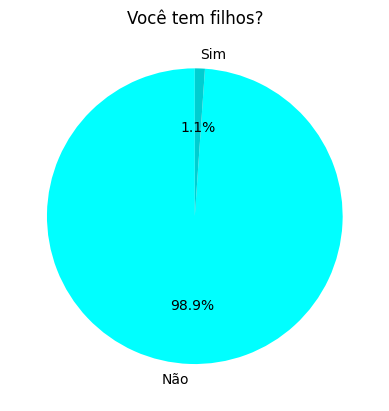

In [14]:
coluna_selecionada = '5. você tem filhos?'	
grafico_pizza(df,coluna_selecionada, title='Você tem filhos?')


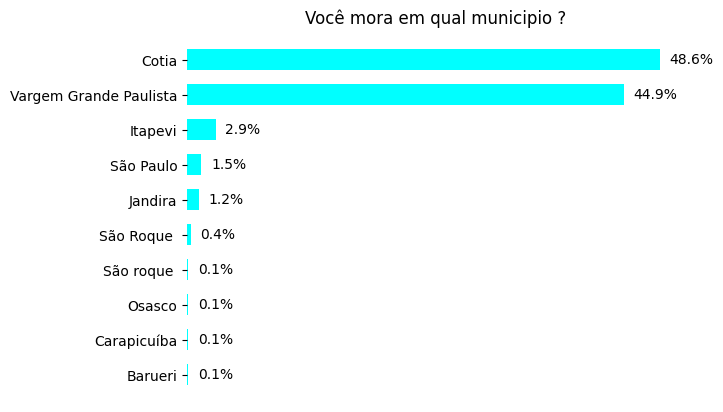

In [15]:
	
coluna_selecionada = '6. você mora em qual município?'
grafico_barra_horizontal(df,coluna_selecionada,title='Você mora em qual municipio ?')

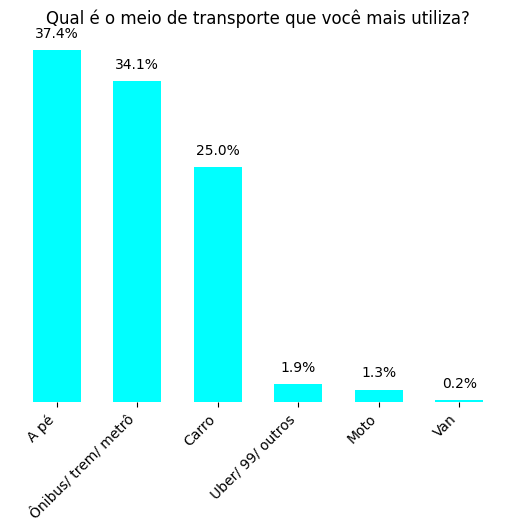

In [16]:
coluna_selecionada = '9. qual é o meio de transporte que você utiliza com mais frequência?'
grafico_barra_vertical45(df,coluna_selecionada,title='Qual é o meio de transporte que você mais utiliza?')

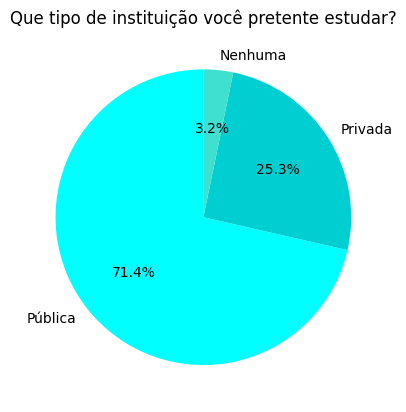

In [17]:
coluna_selecionada = '14.3. em qual tipo de instituição você pretende estudar?'
grafico_pizza(df,coluna_selecionada,title='Que tipo de instituição você pretente estudar?')

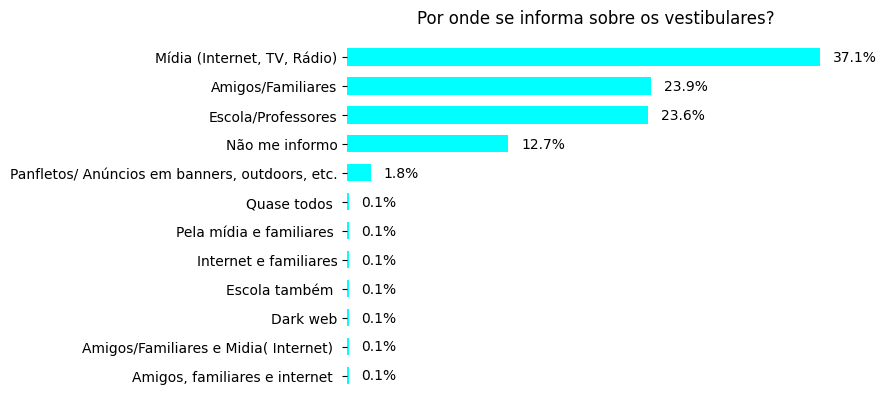

In [18]:
coluna_selecionada = '17. por onde você se informa sobre os vestibulares?'
grafico_barra_horizontal(df,coluna_selecionada,title='Por onde se informa sobre os vestibulares?')


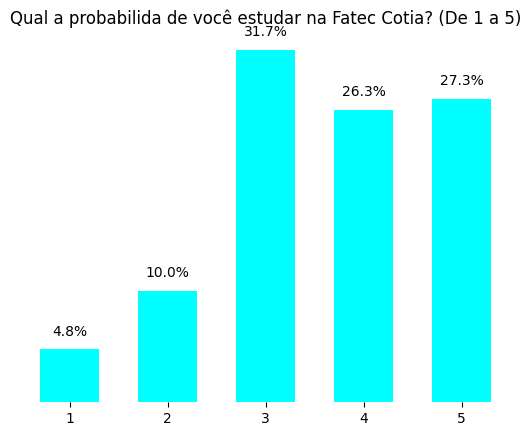

In [19]:
coluna_selecionada = '18. qual a probabilidade de você ingressar em um curso da área de tecnologia, mesmo que não seja sua área de interesse, sabendo que é um curso com boas oportunidades no mercado de trabalho?'
grafico_barra_vertical(df, coluna_selecionada, title='Qual a probabilida de você estudar na Fatec Cotia? (De 1 a 5)')

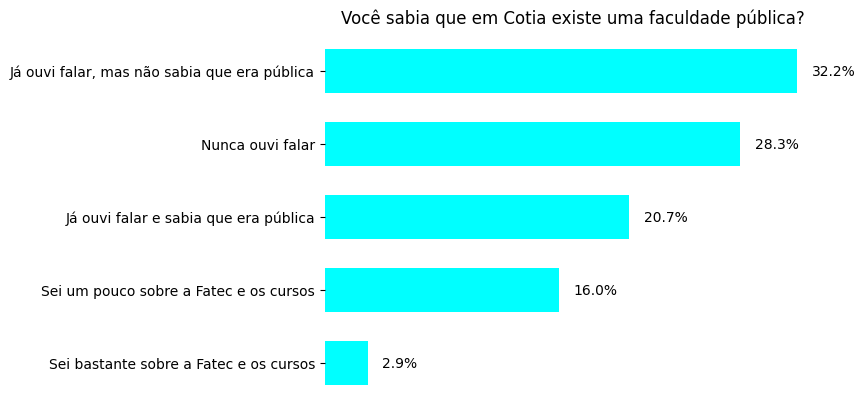

In [20]:
coluna_selecionada = '21. em cotia tem uma faculdade pública, a faculdade de tecnologia (fatec), você sabia dessa informação?'
grafico_barra_horizontal(df, coluna_selecionada, title='Você sabia que em Cotia existe uma faculdade pública?')

In [21]:
# Separa os cursos em uma lista para cada linha
x = df['cursos_lista'] = df['22. você se interessa em algum dos cursos abaixo oferecidos pela fatec cotia?'].apply(lambda x: x.split(',') if pd.notna(x) else [])

# Crie uma lista única de todos os cursos
todos_cursos = [curso.strip() for lista_cursos in df['cursos_lista'] for curso in lista_cursos]

# Crie um DataFrame para contar a ocorrência de cada curso
df_cursos = pd.DataFrame({'curso': todos_cursos})

# Calcule a contagem de cada curso
contagem_cursos = df_cursos['curso'].value_counts().reset_index()
contagem_cursos.columns = ['curso', 'quantidade']

# Calcule o percentual de cada curso
contagem_cursos['percentual'] = (contagem_cursos['quantidade'] / len(df)) * 100

# Exiba o resultado
contagem_cursos








,curso,quantidade,percentual
0,Gestão Empresarial,309,37.637028
1,Desenvolvimento de Software Multiplataforma,263,32.034105
2,Nenhum,247,30.085262
3,Ciência de Dados,115,14.007308
4,Gestão da Produção Industrial,88,10.718636


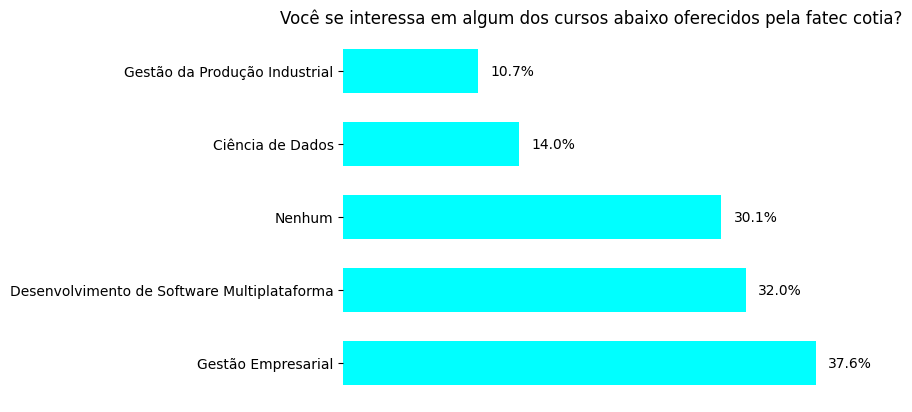

In [22]:

# Ordena o percentual do menor para o maior
contagem_cursos = contagem_cursos.sort_values(by='percentual', ascending=False)

# Criar o gráfico de barras
fig, ax = plt.subplots()

# Barra do gráfico
bars = plt.barh(contagem_cursos['curso'], contagem_cursos['percentual'], height=0.6, color = '#00FFFF')


# Adicionar rótulos nas barras com os percentuais
for bar in bars:
    yval = bar.get_width()
    plt.text(yval + 1, bar.get_y() + bar.get_height() / 2, f'{yval:.1f}%', va='center')


# Adicionar rótulos e título
plt.xlabel('')
plt.ylabel('')
plt.title('Você se interessa em algum dos cursos abaixo oferecidos pela fatec cotia?')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remover números na lateral do eixo x
ax.xaxis.set_visible(False)


# Exibir o gráfico
plt.show()
